<a href="https://colab.research.google.com/github/CharlieWavra/Python-Fundamentals/blob/main/STILL%20WORKING%20ON%20IT%20-%207_2_Visualisation_with_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing data visually with the Seaborn library
---

There are a good number of libraries available containing functions for visualising data with bar charts, pie charts, line plots, box plots, scatter plots and, in some libraries, with more image based visualisations.

To build on the learning of **matplotlib**, this worksheet will use the Seaborn library to create a range of organisations.  It has the main functions we will use in this course:
*  bar charts
*  pie charts
*  line plots
*  box plots
*  scatter plots
*  histogram

Each requires these things:  
1. Select the data columns to be plotted 
2. Prepare the data (remove null values, clean formats, select required columns)  
3. Run the function for the required plot

Once you have the hang of these, you can start to look at labelling, colouring, etc.

In order to begin creating visualisations, you need to:  
* import **seaborn** as **sns**

Test output for Exercises 1 to 7 is in this [image](https://drive.google.com/file/d/1LYxLJyur_zgzvJcv_C1WGm21nf07ddY6/view?usp=sharing)

# IMPORTANT
---
There has been an upgrade to a library needed for reading Excel files in a notebook.  To ensure that you have this upgrade, run the code in the cell below and then select 'Restart runtime' from the Runtime menu.

In [1]:
!pip install --upgrade openpyxl

     |████████████████████████████████| 242 kB 4.4 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


#  Bar charts and Line Plots
---

For these exercises, use the Excel data file:

'public-use-talent-migration' looking at sheet_name 'Country Migration'  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true 

**Example line plot using seaborn**:  
```
import pandas as pd
import seaborn as sns

def show_lineplot(df):
  years_df = df[['net_per_10K_2015','net_per_10K_2016','net_per_10K_2017','net_per_10K_2018','net_per_10K_2019']]
  means = years_df.mean()
  chart = sns.lineplot(data=means)
  labels = list(years_df.columns)
  

# program starts here
url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
df = pd.read_excel(url, sheet_name="Skill Migration")
show_lineplot(df)
```
![plot](https://drive.google.com/uc?id=1erX5EdiJppy-jLRFBhDcqeLHHWqNI6F-)

### Exercise 1 - Line plot of net migration 
--- 

Creating a line plot of mean net migration over the years 2015 to 2019

* create a new dataframe containing only the five columns holding net migration
* create a new data variable to hold the means of the five columns
* create a labels variable to hold the keys (column headings) 
* use ```chart = sns.lineplot(data=prepared dataframe)``` to plot your line chart

***Presentation tips:***   
Plot the chart, then add formatting   

Rotate the x-axis labels in the plot:  
` chart.set_xticklabels(labels, rotation=30)`  

Show the grid:  
`sns.set_style("whitegrid")`

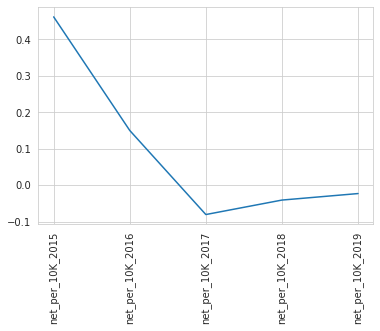

In [29]:
import pandas as pd
import seaborn as sns
url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
df = pd.read_excel(url, sheet_name="Country Migration")


years_df=df[['net_per_10K_2015','net_per_10K_2016','net_per_10K_2017','net_per_10K_2018','net_per_10K_2019']]
means=years_df.mean()
labels=years_df.columns
chart=sns.lineplot(data=means)

chart.set_xticklabels(labels,rotation=90)

sns.set_style("whitegrid")

### Exercise 2 - Creating a Bar chart for yearly migration
---
Create a bar chart which shows the total net migration for the years 2015-2019  
 
* split the migration columns into a new dataframe
* create a data variable, for the y values, from the max() of the five columns
* create a labels variable, this time just create a list of the 5 years ['2015','2016','2017','2018','2019']
* plot the bar chart (`sns.barplot(x=labels, y=y values)` )

***Presentation tips***:
* use `chart.set_xlabel('Year')` and `chart.set_ylabel('Maximum net migration')` to name your axis  

Text(0, 0.5, 'Maximum Net Migration')

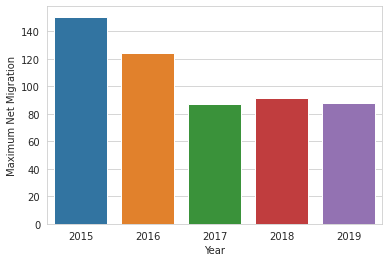

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
url="https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
df=pd.read_excel(url, sheet_name="Country Migration")

net_migration=df[["net_per_10K_2015","net_per_10K_2016","net_per_10K_2017","net_per_10K_2018","net_per_10K_2019"]]
net_migration=net_migration.rename({"net_per_10K_2015":"2015","net_per_10K_2016":"2016","net_per_10K_2017":"2017","net_per_10K_2018":"2018","net_per_10K_2019":"2019"},axis=1)
data=net_migration.max()
labels=data.keys()
chart=sns.barplot(x=labels,y=data)

chart.set_xlabel("Year")
chart.set_ylabel("Maximum Net Migration")

### Exercise 3 - creating a bar graph using grouped data 
---

Create a horizontal bar chart of 2019 mean immigration for each income level ('`target_country_wb_income`')

* create a data variable which contains the means, grouped by '`target_country_wb_income`' 
* extract your labels (x) using the .keys() function 
* use the `sns.barplot` with to create a horizontal bar graph (*Hint: swap the axes so labels is the y axis*)
* add labels to the axes ('Year', 'Net Migration')  
* show the plot  

Try plotting as a vertical bar chart - can you see why horizontally is more appropriate?

Text(0, 0.5, 'Net Migration')

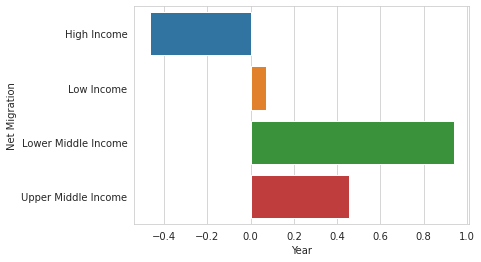

In [54]:
new_df=df[["target_country_wb_income","net_per_10K_2019"]]


income_data=new_df.groupby(["target_country_wb_income"])["net_per_10K_2019"].mean()

labels=income_data.keys()

chart=sns.barplot(x=income_data,y=labels)

chart.set_xlabel("Year")
chart.set_ylabel("Net Migration")

# Pie Charts, Box Plots, Scatter Plots and Histograms
---

For these exercises you will use the Psychology dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

To get the data ready:

* read csv file above and save into a new variable called `psych_data`

### Exercise 4 - Creating a pie chart of stress data
---
Create a pie chart which shows how stressed students who speak different languages are.   

To do this:

* similar to Exercise 2 - create a variable which groups the means of data by firstlanguage  
* store the means for 'Stress' in a variable called stress_data
* extract your labels using the keys() function

Seaborn doesn't have a function for plotting pie charts but you can use Seaborn functions for styling pie charts created by matplotlib.

* add an import statement above your funciton to import the matplotlib.pyplot library, aliased as plt
* use the Seaborn function `colors = sns.color_palette('pastel')`to create a colour palette for the chart.  (_Hint: you can find a list of available palettes [here](https://seaborn.pydata.org/tutorial/color_palettes.html)_)
* plot your pie chart using `plt.pie()` adding parameters to set labels and a color theme **colors = colors**
* write a comment noting anything interesting about the visualisation




### Exercise 5 - Creating a box plot of Wellbeing
---
A box plot is used to visualise summary infomation about a data series such as the min, max and median. 

Create a box plot of the Wellbeing scores

*  split off the wellbeing column into a new dataframe
*  create a label list containing the label ['Wellbeing']
*  use `chart = sns.boxplot(data=new_df)` to create a boxplot 
*  set the x-axis label using `chart.set_xticklabels(labels)`

### Exercise 6 - Histograms of  age 
---

Create a histogram which shows the frequency distribution for '`Wellbeing`'.

* split the `Wellbeing` column off to provide the data
* plot the histogram using `chart = sns.histplot(data=data)` 
* add labels using `chart.set_xlabel()` and `chart.set_ylabel()`
* change the colours of the bars - try adding `color='chosen colour'` choosing a single colour name e.g. red, blue, etc) to the parameters for the histplot


### Exercise 7 - Create a scatterplot of Wellbeing and Stress with line of best fit
---

Assuming that Stress is fairly closely associated with Wellbeing:

Create a scatterplot of Wellbeing and Stress data.

* create **x** from the `Stress` column
* create **y** from the `Wellbeing` column
* use `chart=sns.scatterplot(x=x,y=y)` to create a scatterplot
* add x axis and y axis labels using `chart.set_xlabel('Stress')` and `chart.set_ylabel('Wellbeing')`

Adding a line of best fit:   
* the Seaborn library has a function that will plot a scatter plot with a line of best fit generated from a linear regression
* replace the instruction to create the scatter plot with `chart=sns.regplot(x=x, y=y)` 

Write a short data story ( a description of the data.  What conclusion could be reached from the chart?  How confident could you be in this conclusion and why?




### Exercise 8 - Create a set of charts from a data set
---
Use the student exam scores dataset here: https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/student_scores.csv

Investigate the data and create a set of charts.  

Create each chart in a new code cell.

Add a text cell below each visualisation to explain what the chart is showing.


# Further reference on Seaborn

[Seaborn documentation](https://seaborn.pydata.org/index.html)